In [1]:
import h5py
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import numpy as np
import datetime
import pandas as pd
import sys
!{sys.executable} -m pip install tqdm
from dasquakes import *
import obspy
import os
from run_pca_one import *
import datetime

#fix the problem with tqdm

# 1. Choose the following parameters to select data to examine

In [2]:
cable='whidbey'
record_length = 1  #minutes
t0 = datetime.datetime(2022,11 , 15, 7, 0, 0)

# 2. Run the functions to return the data

In [3]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

# 3. Use $attrs$ to see the aquisition parameters

In [4]:
nt = data.shape[0]
nx = data.shape[1]
#print(f'Number of time steps: {nt}, Number of channels: {nx}')
#print(nt)
#print(nx)
#print(data.shape)
#print (f"Nyquist Frequency: {attrs['MaximumFrequency']} Hz, cable length: {attrs['SpatialSamplingInterval']*nx} m")

# 4. Make a simple plot of the data

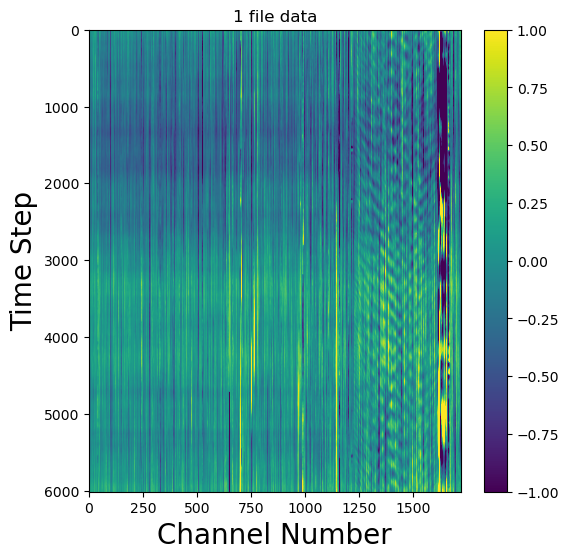

In [8]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(6,6))
plt.imshow(data,aspect='auto',vmin=-1,vmax=1)
plt.title('1 file data')
plt.xlabel('Channel Number', fontsize=20)
plt.ylabel('Time Step',fontsize=20)
plt.colorbar()
#plt.savefig('5test.pdf', format="pdf")
#plt.show()
#my own to do
#save 2 different images in PNG, THEN COMPARE THAT (DIFFERENT TIME_LENGHT 1 MIN Y 5 MIN), ready 
#save lo mismo pero 1 mes después.
#save lo mismo un mes después.

# Calculate fourier transform.

In [10]:
#fk_anaylisis is a function that return, f frecuency, number of wave k, and ft.
ft,f,k = fk_analysis(t0,draw_figure=False, cable = 'whidbey', record_length = 1)
#ft = fftshift(fft2(downsampled_subsea_data))
# f = fftshift(fftfreq(downsampled_subsea_data.shape[0], d=0.01 * downsamplefactor)), relate with time step (nt)
# k=   k = fftshift(fftfreq(downsampled_subsea_data.shape[1], d=attrs['SpatialSamplingInterval'])) related with channels
#print(ft)
#print(f.shape)
#print(f)


(-3.0, 3.0)

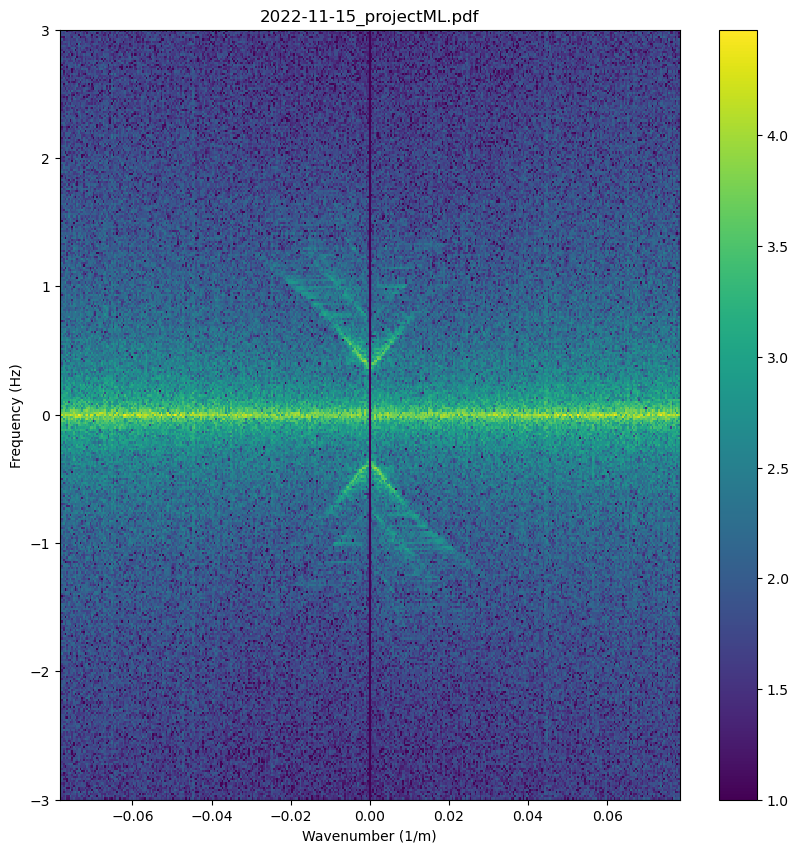

In [11]:
#creating fk plot for t0
plt.subplots(figsize=(10,10))
c=plt.pcolormesh(k,f,np.log10(np.abs(ft)),vmin=1)
plt.colorbar(c)
plt.title('2022-11-15_projectML.pdf')
plt.xlabel('Wavenumber (1/m)')
plt.ylabel('Frequency (Hz)')
plt.ylim(-3,3)
#plt.savefig('fk_10min_5_8_22.pdf', format="pdf")

100%|██████████| 240/240 [02:45<00:00,  1.45it/s]


SVD runtime:   1.9314280096441507 s
Total runtime: 167.95581910386682 s


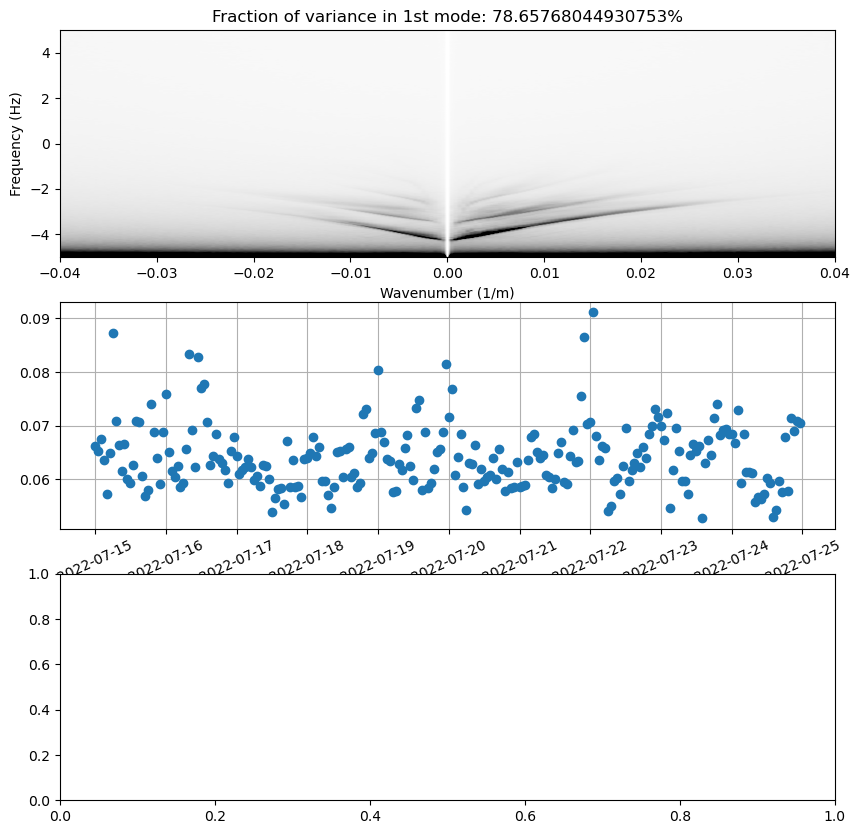

In [12]:

resultssvdb=main()




NameError: name 'S' is not defined

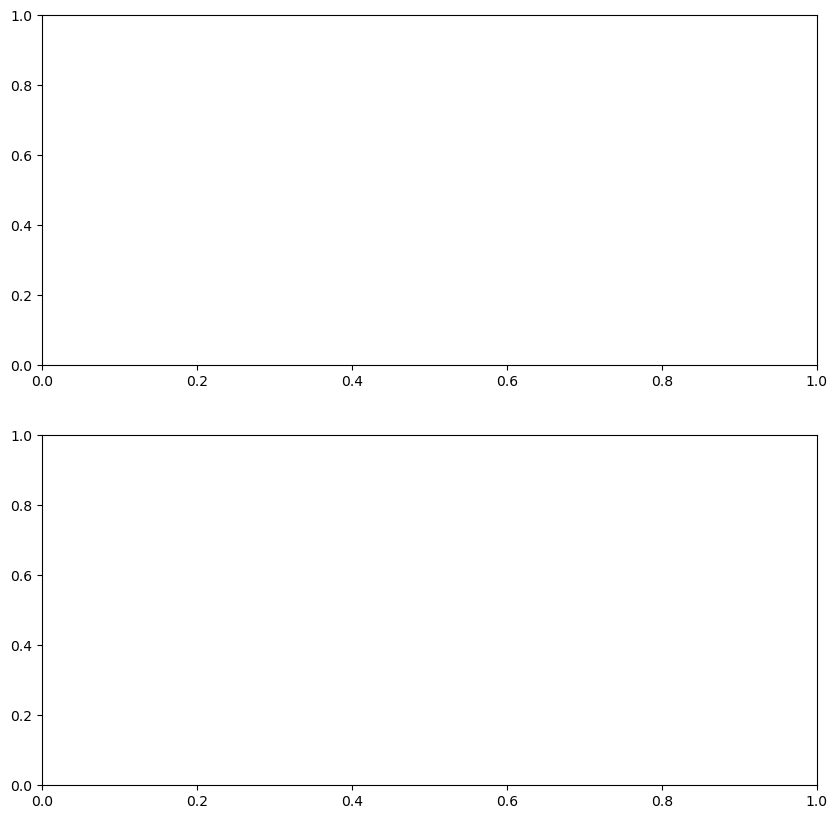

NameError: name 'D' is not defined